Step 1: List Down Features and Their Types
The Iris dataset contains the following columns:

sepal_length: Numeric (continuous)

sepal_width: Numeric (continuous)

petal_length: Numeric (continuous)

petal_width: Numeric (continuous)

species: Nominal (categorical)

Features and their types:
sepal_length: Numeric (Continuous)
sepal_width: Numeric (Continuous)
petal_length: Numeric (Continuous)
petal_width: Numeric (Continuous)
species: Nominal (Categorical)


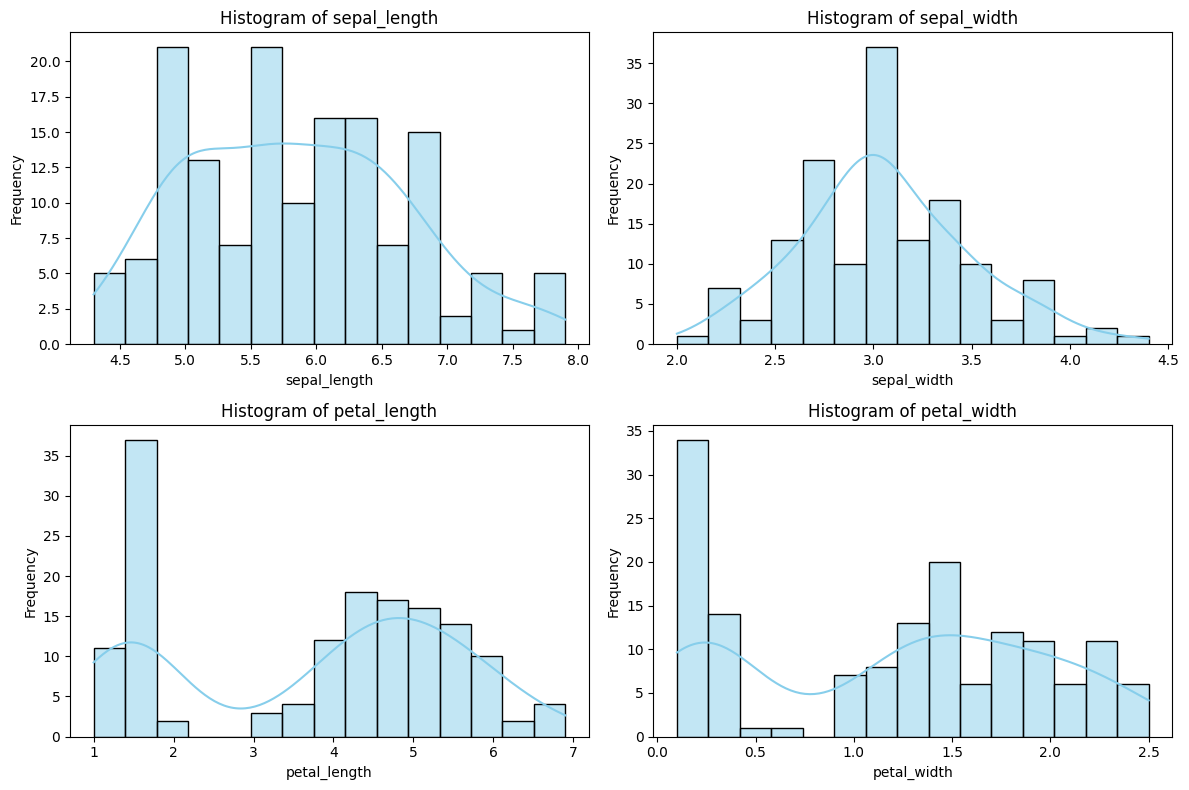

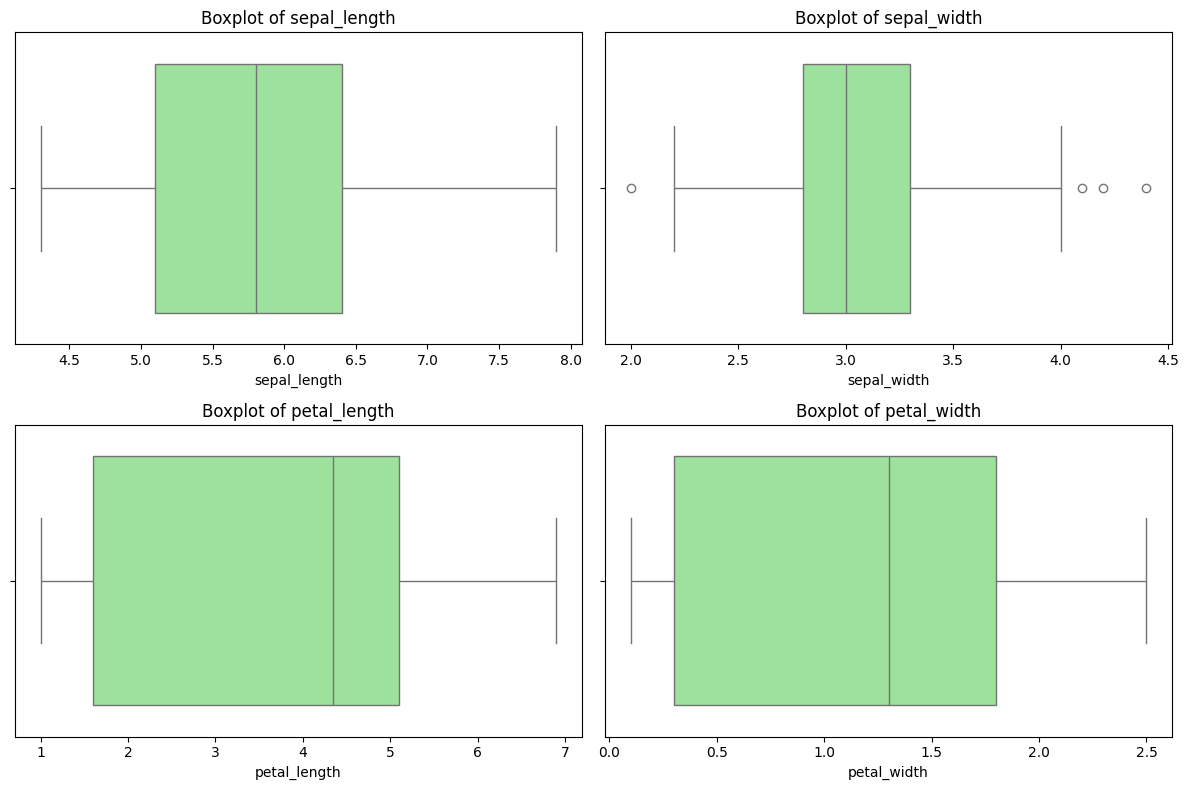

In [1]:
# Importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = sns.load_dataset('iris')

# Step 1: List of features and their types
features = {
    'sepal_length': 'Numeric (Continuous)',
    'sepal_width': 'Numeric (Continuous)',
    'petal_length': 'Numeric (Continuous)',
    'petal_width': 'Numeric (Continuous)',
    'species': 'Nominal (Categorical)'
}
print("Features and their types:")
for feature, dtype in features.items():
    print(f"{feature}: {dtype}")

# Step 2: Plot Histograms for each feature
plt.figure(figsize=(12, 8))

for i, feature in enumerate(['sepal_length', 'sepal_width', 'petal_length', 'petal_width']):
    plt.subplot(2, 2, i+1)
    sns.histplot(iris[feature], kde=True, bins=15, color='skyblue')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Step 3: Plot Boxplots for each feature
plt.figure(figsize=(12, 8))

for i, feature in enumerate(['sepal_length', 'sepal_width', 'petal_length', 'petal_width']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=iris[feature], color='lightgreen')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()


Step 4: Compare Distributions and Identify Outliers
After plotting the histograms and boxplots, let's analyze them.

Histograms:

Sepal Length and Petal Length: These features have a relatively normal distribution with a peak at certain values. Petal length shows a more pronounced right-skew, whereas sepal length appears more evenly distributed.

Sepal Width and Petal Width: Both of these features exhibit more variation, with petal width showing a slight right skew.

Boxplots:

Outliers: Outliers are clearly visible in the boxplots:

Petal Length: There are a few higher values that might be considered outliers.

Sepal Width: The boxplot reveals some outliers on the higher end.

Median: The boxplots reveal that the medians of all features (except petal width) are fairly centered within the interquartile range (IQR).

Feature Comparison:

Petal Length vs Petal Width: Petal length has a larger range compared to petal width, and petal width has more tightly clustered data.

Sepal Length vs Sepal Width: Sepal length has a wider distribution compared to sepal width, which is more concentrated around the median.

Observations and Inferences:
Petal Length and Petal Width have relatively similar distributions, with Petal Length having a larger range.

Sepal Width seems to have more variation, especially in the upper range, indicating potential outliers.

Species Distribution: Since the dataset contains different species of Iris flowers, you might want to explore the relationship between these features and the species (e.g., by using a pair plot or scatter plot to compare features across species).

